In [440]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,  OneHotEncoder,LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import datetime as dt
from sklearn.decomposition import PCA

# Choose a dataset from the provided list

In [441]:
df_adult_income=pd.read_csv('C:/Users/Dell/Downloads/adult.csv')
df_adult_income.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


What is the target? (You are required to complete a classification task for this project)


* The Target is "income" with object type so the model will be a classification model. 

What does one row represent? (A person? A business? An event? A product?)

* A row represent a person

In [442]:
#How many features does the data have?
df_adult_income

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


* The Data have 15 Features 

How many rows are in the dataset?

* 48842 rows in the dataset

# Explore/clean the data

In [443]:
#What opportunities exist for dimensionality reduction or feature selection with this dataset?
df_adult_income.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [444]:
df_adult_income.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

This dataset can be treated with feature selection model, we have to process the data then select the important features. 

In [445]:
df_adult_income=df_adult_income.drop(columns='educational-num')

What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?


* The challenge with this dataset is the object data processing as the target column is object. 

### Part 1

In [446]:
df_adult_income.head(5)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Exploratory Visualizations

### Numeric analysis

In [447]:
corr = df_adult_income.corr(numeric_only=True)
corr

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.003706,-0.004366,-0.013519
capital-gain,0.077229,-0.003706,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.082157,0.054467,1.000000


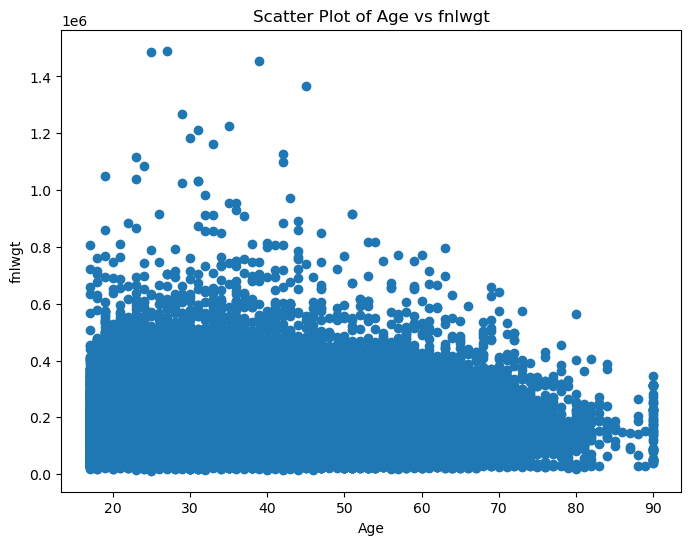

In [448]:
plt.figure(figsize=(8, 6))
plt.scatter(df_adult_income['age'], df_adult_income['fnlwgt'])
plt.title('Scatter Plot of Age vs fnlwgt')
plt.xlabel('Age')
plt.ylabel('fnlwgt')
plt.show()

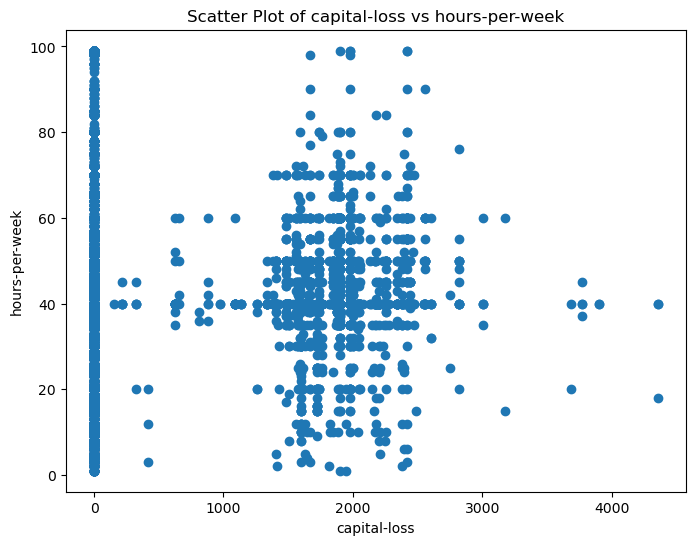

In [449]:
plt.figure(figsize=(8, 6))
plt.scatter(df_adult_income['capital-loss'], df_adult_income['hours-per-week'])
plt.title('Scatter Plot of capital-loss vs hours-per-week')
plt.xlabel('capital-loss')
plt.ylabel('hours-per-week')
plt.show()

# Explore/clean the data

In [450]:
df_adult_income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [451]:
df_adult_income['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [452]:
df_adult_income['workclass']=df_adult_income['workclass'].replace('?', 'Private')

In [453]:
df_adult_income['workclass'].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [454]:
df_adult_income['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [455]:
df_adult_income['occupation']=df_adult_income['occupation'].replace('?', 'Prof-specialty')

In [456]:
df_adult_income['occupation'].value_counts()

Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [457]:
df_adult_income['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [458]:
df_adult_income['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [459]:
df_adult_income['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [460]:
df_adult_income['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [461]:
df_adult_income['native-country']=df_adult_income['native-country'].replace('?', 'United-States')

In [462]:
df_adult_income['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [463]:
df_adult_income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [464]:
df_adult_income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

# Exploratory Visualizations

### Distribution of workclass column

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Local-gov'),
  Text(2, 0, 'Self-emp-not-inc'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'State-gov'),
  Text(5, 0, 'Self-emp-inc'),
  Text(6, 0, 'Without-pay'),
  Text(7, 0, 'Never-worked')])

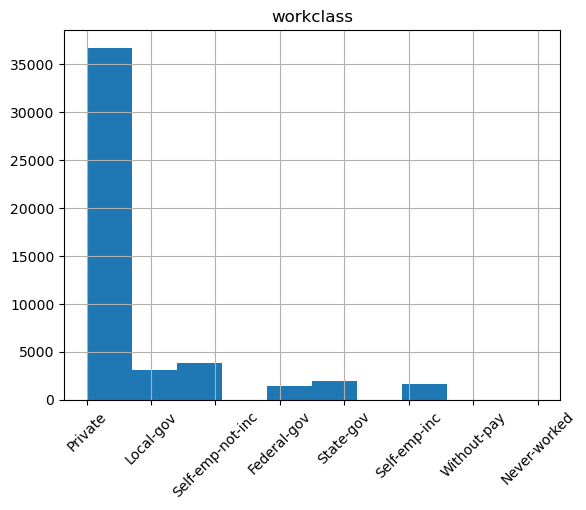

In [465]:
df_adult_income['workclass'].hist()
plt.title('workclass')
plt.xticks(rotation=45)

### Distribution of occupation column

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Machine-op-inspct'),
  Text(1, 0, 'Farming-fishing'),
  Text(2, 0, 'Protective-serv'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Craft-repair'),
  Text(6, 0, 'Adm-clerical'),
  Text(7, 0, 'Exec-managerial'),
  Text(8, 0, 'Tech-support'),
  Text(9, 0, 'Sales'),
  Text(10, 0, 'Priv-house-serv'),
  Text(11, 0, 'Transport-moving'),
  Text(12, 0, 'Handlers-cleaners'),
  Text(13, 0, 'Armed-Forces')])

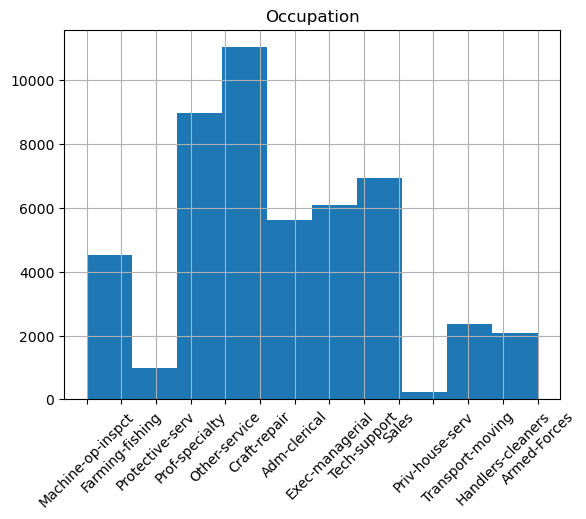

In [466]:
df_adult_income['occupation'].hist()
plt.title('Occupation')
plt.xticks(rotation=45)

### Education Column

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '11th'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, 'Assoc-acdm'),
  Text(3, 0, 'Some-college'),
  Text(4, 0, '10th'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, '7th-8th'),
  Text(7, 0, 'Bachelors'),
  Text(8, 0, 'Masters'),
  Text(9, 0, 'Doctorate'),
  Text(10, 0, '5th-6th'),
  Text(11, 0, 'Assoc-voc'),
  Text(12, 0, '9th'),
  Text(13, 0, '12th'),
  Text(14, 0, '1st-4th'),
  Text(15, 0, 'Preschool')])

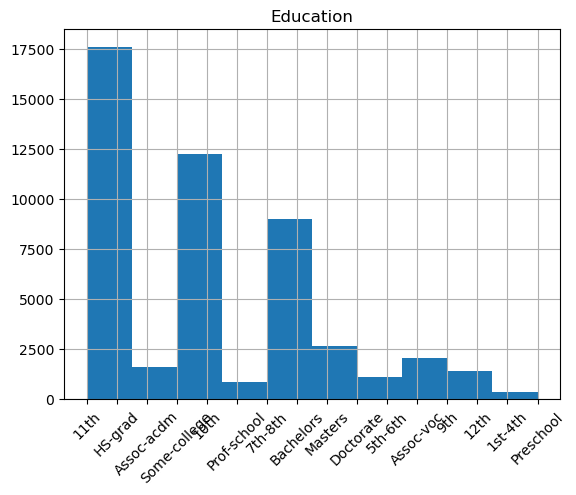

In [467]:
df_adult_income['education'].hist()
plt.title('Education')
plt.xticks(rotation=45)

### Marital Status

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Never-married'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Widowed'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Married-spouse-absent'),
  Text(6, 0, 'Married-AF-spouse')])

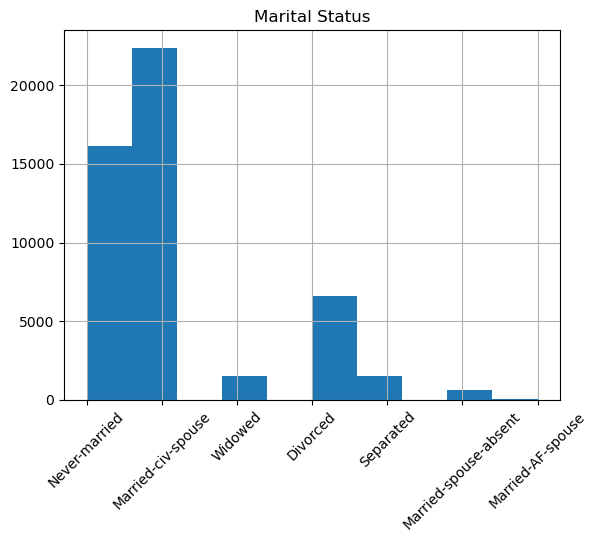

In [468]:
df_adult_income['marital-status'].hist()
plt.title('Marital Status')
plt.xticks(rotation=45)

### Distribution of race column

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Black'),
  Text(1, 0, 'White'),
  Text(2, 0, 'Asian-Pac-Islander'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Amer-Indian-Eskimo')])

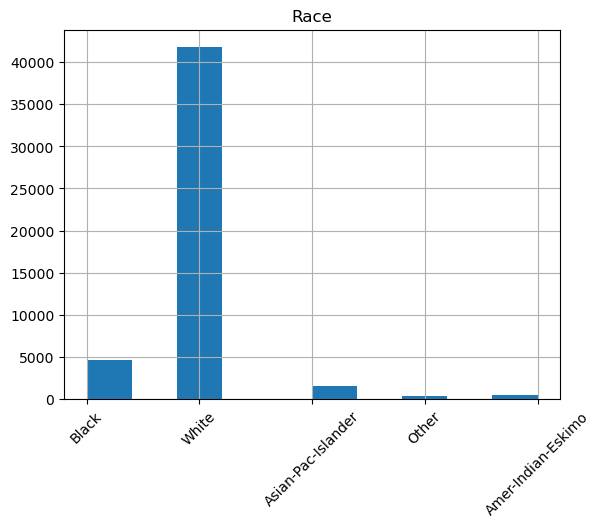

In [469]:
df_adult_income['race'].hist()
plt.title('Race')
plt.xticks(rotation=45)

### Gender Column

([0, 1], [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

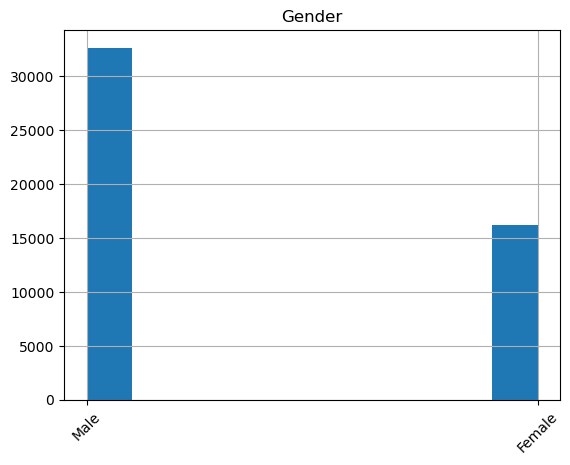

In [470]:
df_adult_income['gender'].hist()
plt.title('Gender')
plt.xticks(rotation=45)

### Distribution of capital gain column

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]),
 [Text(-20000.0, 0, '−20000'),
  Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000')])

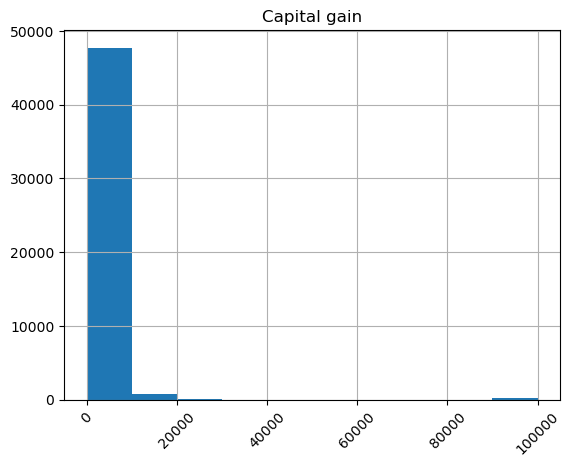

In [471]:
df_adult_income['capital-gain'].hist()
plt.title('Capital gain')
plt.xticks(rotation=45)

### Capital Loss Distribution

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000')])

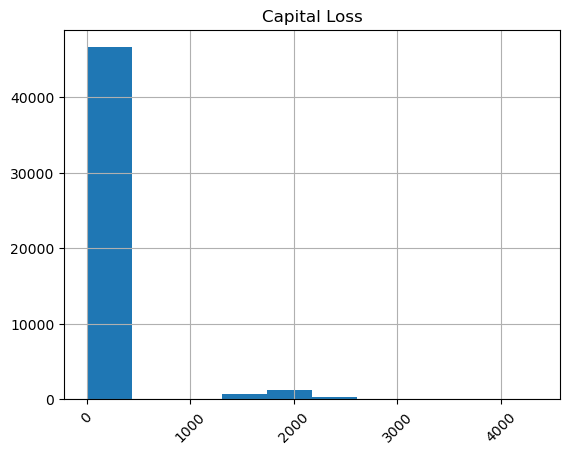

In [472]:
df_adult_income['capital-loss'].hist()
plt.title('Capital Loss')
plt.xticks(rotation=45)

### Hours per week 

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

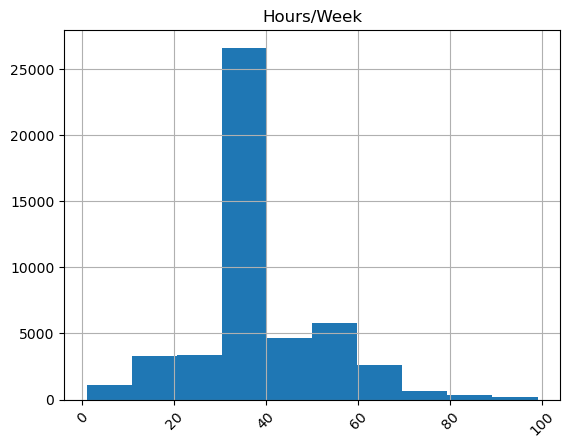

In [473]:
df_adult_income['hours-per-week'].hist()
plt.title('Hours/Week')
plt.xticks(rotation=45)

# Choose a model

In [474]:
le = LabelEncoder()

In [475]:
numeric_col=df_adult_income.select_dtypes('number').columns

In [476]:
Categorical_col = df_adult_income.select_dtypes('object').columns
print('categorical columns: ', Categorical_col)

categorical columns:  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


In [477]:
for col in Categorical_col:
    df_adult_income[col] = le.fit_transform(df_adult_income[col])

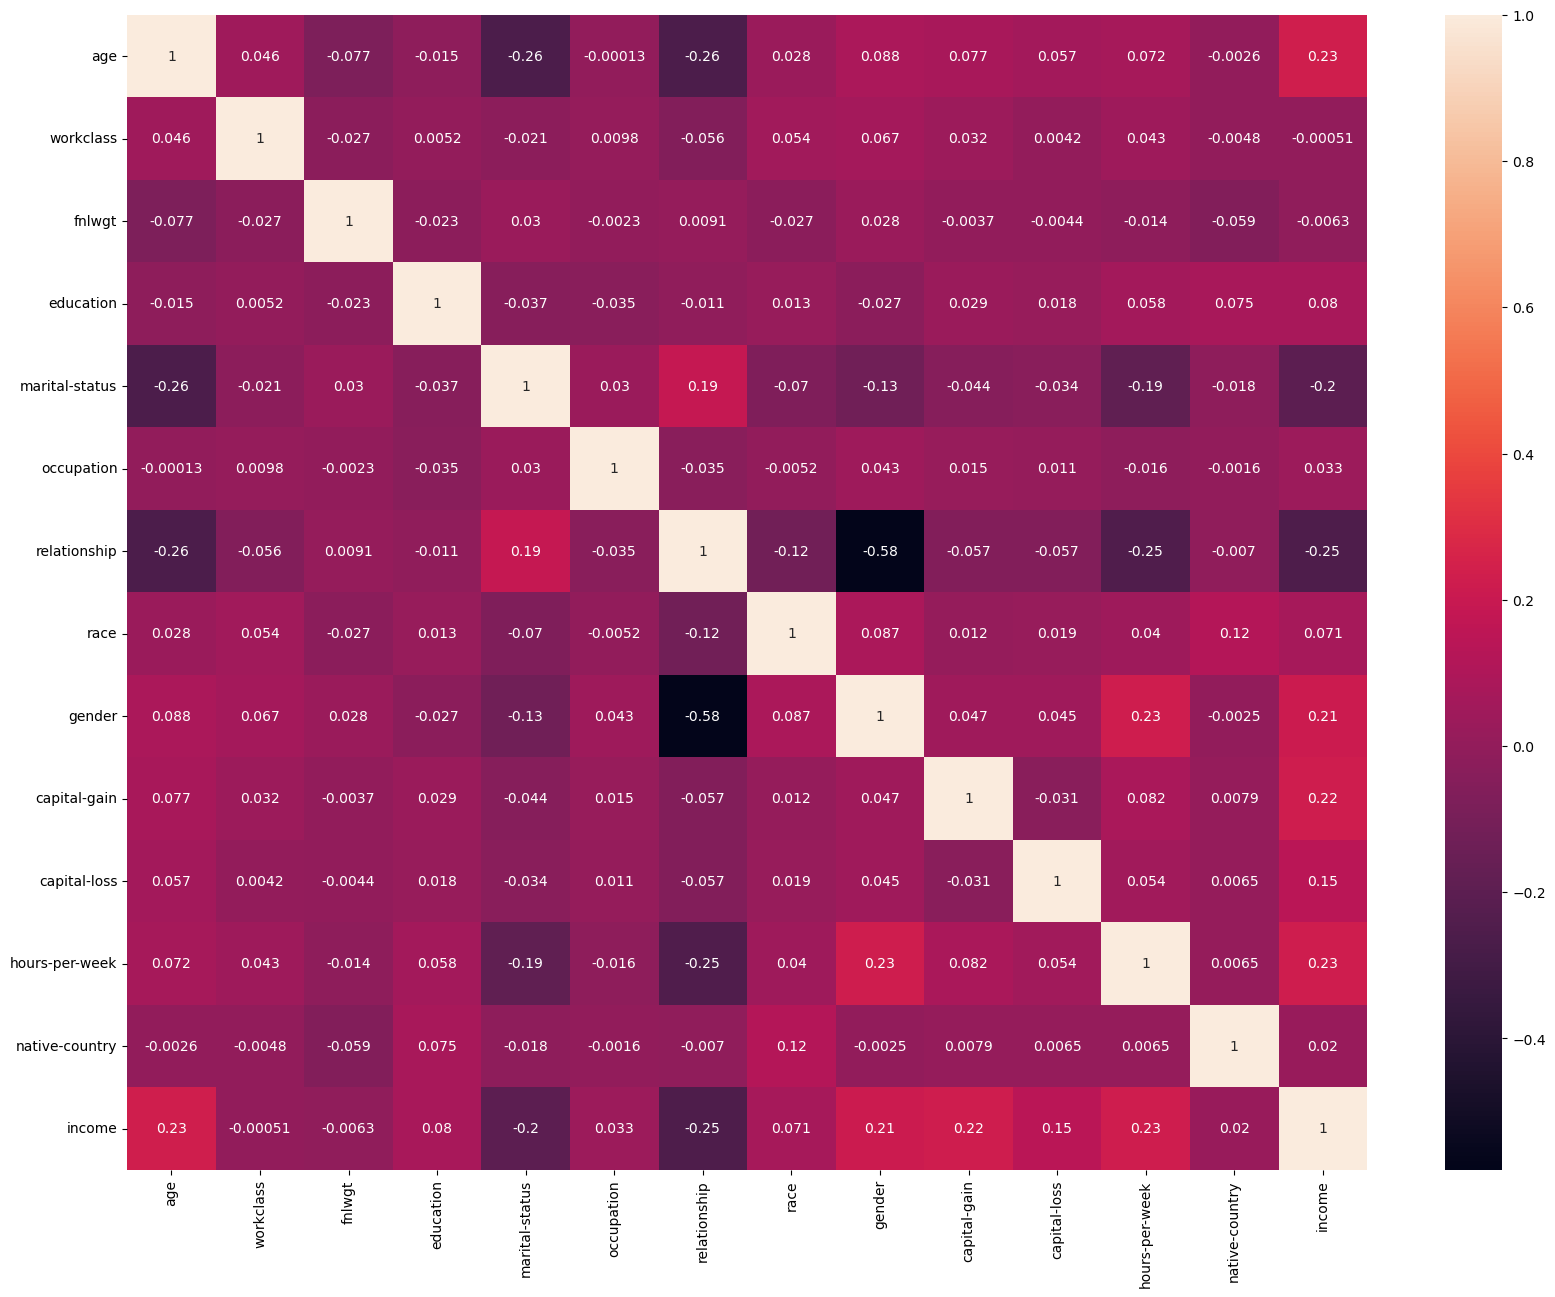

In [478]:
plt.figure(figsize=(20,15))
sns.heatmap(df_adult_income.corr(),annot=True)
plt.show()

In [479]:
y = df_adult_income['income']
x = df_adult_income.drop(columns=['income'])
xtrain,xtest,ytrain,ytest = train_test_split(x,y, random_state=42)

In [480]:
from sklearn.neighbors import KNeighborsClassifier

In [481]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=6)

In [482]:
#Random Forest Classifier Model
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
    # Get the classification report
    report = classification_report(y_true, y_pred)
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)
    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    # create a confusion matrix  of raw counts
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
    axes[0].set_title("Raw Counts")
    # create a confusion matrix with the test data
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")
    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()
    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict




In [483]:
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
    # Get predictions for training data
    y_train_pred = model.predict(X_train)
    # Call the helper function to obtain regression metrics for training data
    results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
    print()
    # Get predictions for test data
    y_test_pred = model.predict(X_test)
    # Call the helper function to obtain regression metrics for test data
    results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
    if output_dict == True:
        # Store results in a dataframe if ouput_frame is True
        results_dict = {'train':results_train,
                    'test': results_test}
        return results_dict

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     27801
           1       0.83      0.34      0.48      8830

    accuracy                           0.82     36631
   macro avg       0.82      0.66      0.69     36631
weighted avg       0.82      0.82      0.79     36631



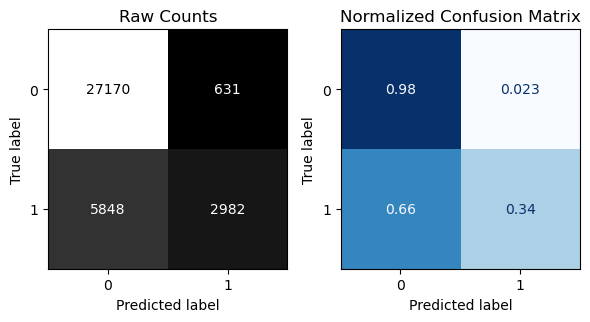


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      9354
           1       0.68      0.27      0.39      2857

    accuracy                           0.80     12211
   macro avg       0.74      0.62      0.63     12211
weighted avg       0.78      0.80      0.76     12211



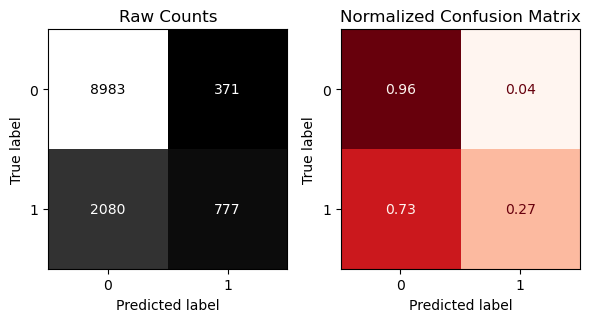

In [484]:
evaluate_classification(knn, xtrain,ytrain, xtest, ytest)

Extract and visualize the top 10 features using permutation importance (from Intro to ML Week 4)

# Create Explanatory Visualizations for the most important features

In [485]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6), 
                          color_dict=None):
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)
        
    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)
        
    # set titles and axis labels
    ax.set(xlabel='Importance', 
           ylabel='Feature Names', 
           title=title)
    
    ## return ax in case want to continue to update/modify figure
    return ax

In [486]:
from sklearn.inspection import permutation_importance
r = permutation_importance(knn, xtest, ytest,n_repeats =5)

In [487]:
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [488]:
permutation_importances = pd.Series(r['importances_mean'],index=xtest.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

capital-gain      0.063091
capital-loss      0.009238
fnlwgt            0.007010
hours-per-week    0.002522
age               0.002490
education         0.001065
workclass         0.000098
relationship      0.000082
race              0.000033
marital-status    0.000000
gender            0.000000
native-country   -0.000016
occupation       -0.000082
Name: permutation importance, dtype: float64

[Text(0.5, 0, 'Permutation Importance')]

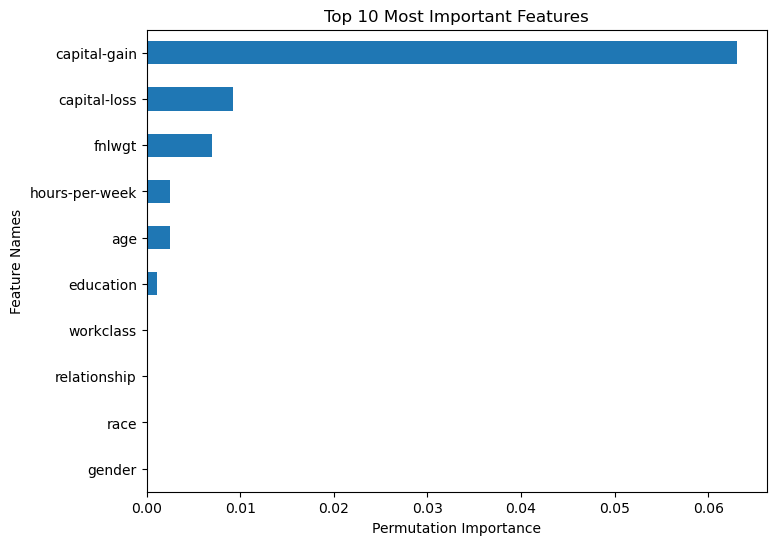

In [489]:
ax = plot_importance_color(permutation_importances,top_n=10)
ax.set(xlabel='Permutation Importance')

These top 10 features makes sence in the income (capital gain, capital loss, age and hours per week)

### Create Explanatory Visualizations for the most important features

In [490]:
permutation_importances.sort_values(ascending=False).head(10)

capital-gain      0.063091
capital-loss      0.009238
fnlwgt            0.007010
hours-per-week    0.002522
age               0.002490
education         0.001065
workclass         0.000098
relationship      0.000082
race              0.000033
marital-status    0.000000
Name: permutation importance, dtype: float64

In [491]:
plot_train = pd.concat([xtrain,ytrain],axis=1)
plot_test = pd.concat([xtest,ytest],axis=1)
plot_df = pd.concat([plot_train, plot_test])
plot_df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
27859,41,3,27187,8,2,9,0,4,1,0,2415,12,38,1
5654,39,3,319052,9,2,5,5,1,0,0,0,37,29,0
3779,34,3,260560,9,2,3,0,4,1,0,0,50,38,1
10522,56,5,368797,12,2,11,0,4,1,0,0,40,38,1
22461,71,5,163293,14,2,4,0,4,1,0,0,2,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30726,34,3,345360,9,2,12,0,4,1,0,0,40,8,0
7744,29,3,472344,4,2,5,1,4,1,0,0,40,25,0
19832,24,3,69045,15,4,11,1,2,1,0,0,40,22,0
42129,42,5,82297,5,2,7,5,2,0,0,0,50,38,0


### Capital gain and income

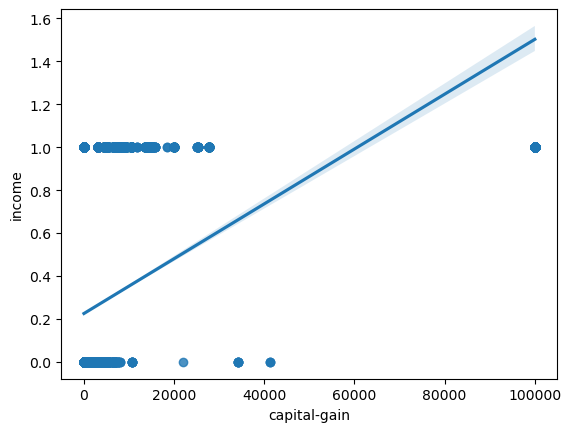

In [492]:
sns.regplot(data=plot_df, x='capital-gain',y='income');

C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


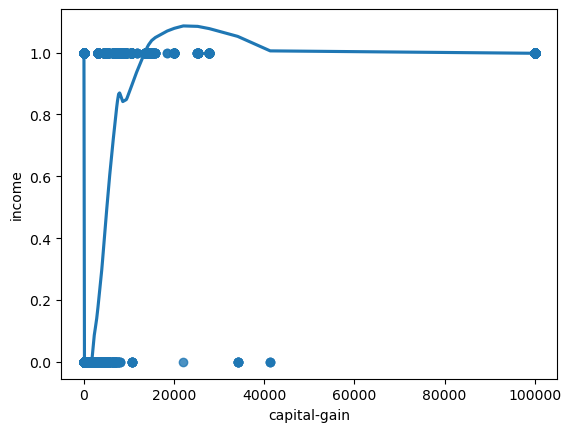

In [493]:
sns.regplot(data=plot_df, x='capital-gain',y='income', lowess=True);

we can see that we have a trend when the income is increasing with more income for about 40000 of capital gain. that means that for 
more than 40000 of capital gain the adult should be investing his income. 

### capital-loss and income

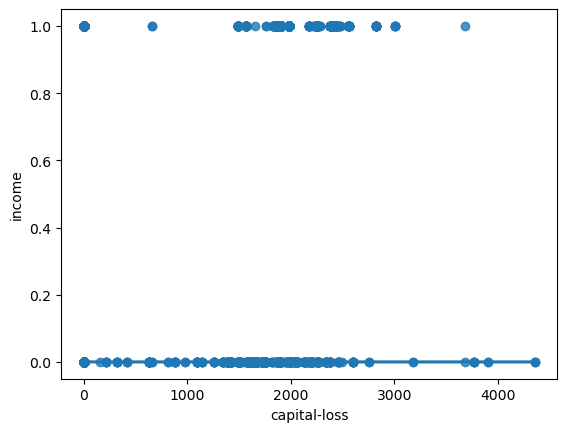

In [494]:
sns.regplot(data=plot_df, x='capital-loss',y='income', lowess=True);

the income still very low with more capital loss.

# Part 2

### PCA

In [495]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [496]:
#Apply PCA  to keep .85 variance ratio 
pca = PCA(n_components=0.85)
xtrain_pca85 = pca.fit_transform(xtrain)
xtest_pca85 = pca.transform(xtest)

In [497]:
xtrain_pca85=pd.DataFrame(xtrain_pca)
xtrain_pca85.head()

,0
0,-162493.783609
1,129371.269914
2,70879.270012
3,179116.269628
4,-26387.730149


In [498]:
# Apply P3CA to get 3 principal components for the data. Concatenate/combine these PC’s with the original features (X_train, X_test data).
pca3 = PCA(n_components=3)
df_income_pca=pca3.fit_transform(df_adult_income)
df_income_pca=pd.DataFrame(df_income_pca)

In [499]:
df_income_pca=pd.concat([df_adult_income, df_income_pca], axis=1)

Text(0, 0.5, 'inertia')

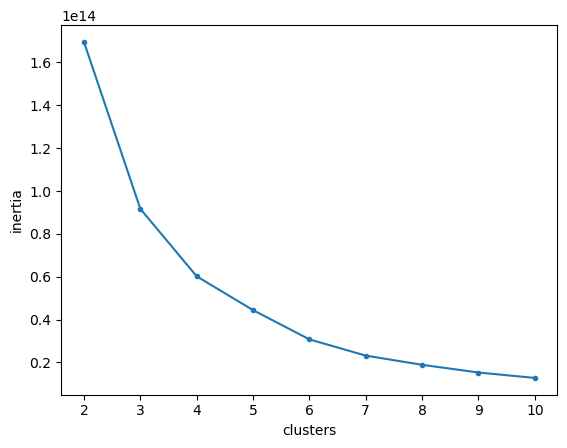

In [500]:
#Apply Clustering, select the appropriate number of clusters, and use the clustering object to get predicted clusters for the training and test data. 
#Concatenate/combine these clusters with the original features. 
inertias = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state = 42)  
    kmeans.fit(xtrain)  
    inertias.append(kmeans.inertia_)
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

we will take k=2

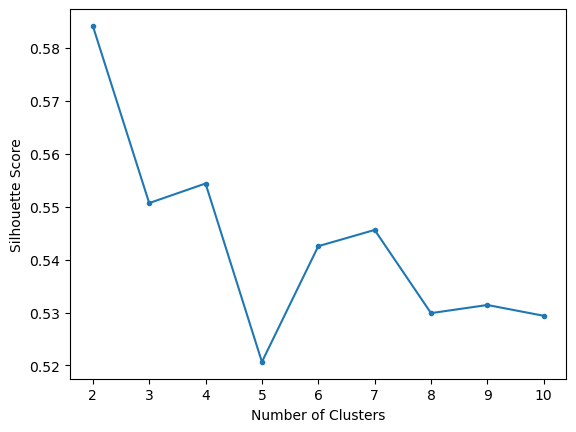

In [501]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i, n_init = 'auto', random_state = 42)
  kmeans.fit(xtrain)
  silhouette_scores.append(silhouette_score(xtrain, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [502]:
kmeans2 = KMeans(n_clusters = 2, n_init = 'auto', random_state = 42)
kmeans.fit(xtrain)
silhouette_score(xtrain, kmeans.labels_)

0.5293829812110886

In [503]:
xtrain['cluster'] = kmeans.labels_

In [504]:
kmeans.fit(xtest)
silhouette_score(xtest, kmeans.labels_)
xtest['cluster'] = kmeans.labels_

In [505]:
xtrain.head(5)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,cluster
27859,41,3,27187,8,2,9,0,4,1,0,2415,12,38,6
5654,39,3,319052,9,2,5,5,1,0,0,0,37,29,4
3779,34,3,260560,9,2,3,0,4,1,0,0,50,38,7
10522,56,5,368797,12,2,11,0,4,1,0,0,40,38,0
22461,71,5,163293,14,2,4,0,4,1,0,0,2,38,9


In [506]:
# Fit and evaluate with updated features:
# PCA 0.85
knn.fit(xtrain_pca85,ytrain)

KNeighborsClassifier(n_neighbors=6)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     27801
           1       0.70      0.19      0.30      8830

    accuracy                           0.79     36631
   macro avg       0.75      0.58      0.59     36631
weighted avg       0.77      0.79      0.73     36631



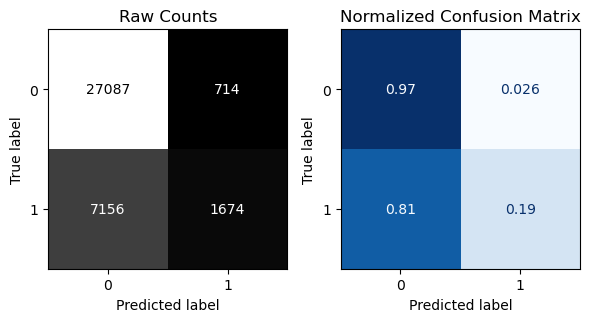


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      9354
           1       0.36      0.09      0.15      2857

    accuracy                           0.75     12211
   macro avg       0.57      0.52      0.50     12211
weighted avg       0.68      0.75      0.69     12211



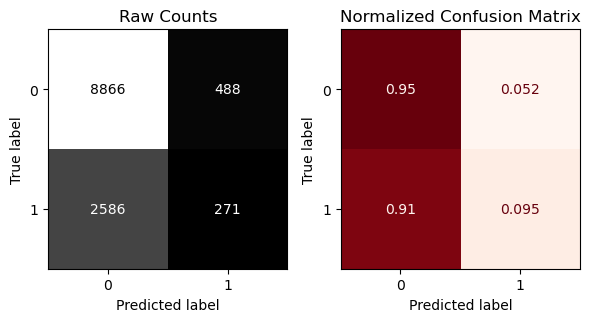

In [507]:
evaluate_classification(knn, xtrain_pca85,ytrain, xtest_pca85, ytest)

In [508]:
df_income_pca

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,0,1,2
0,25,3,226802,1,4,6,3,2,1,0,0,40,38,0,37138.149346,-1069.158083,-88.736501
1,38,3,89814,11,2,4,0,4,1,0,0,50,38,0,-99849.846050,-1105.158609,-91.037014
2,28,1,336951,7,2,10,0,4,1,0,0,40,38,1,147287.145483,-1040.207525,-86.840721
3,44,3,160323,15,2,6,0,2,1,7688,0,40,38,1,-29342.869356,6601.360908,-76.720482
4,18,3,103497,15,4,9,3,4,0,0,0,30,38,0,-86166.846297,-1101.567889,-90.877726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,7,2,12,5,4,0,0,0,38,38,0,67638.148263,-1061.141769,-88.211906
48838,40,3,154374,11,2,6,0,4,1,0,0,40,38,1,-35289.848297,-1088.191656,-89.944136
48839,58,3,151910,11,6,0,4,4,0,0,0,40,38,0,-37753.848388,-1088.836856,-89.952482
48840,22,3,201490,11,4,0,3,4,1,0,0,20,38,0,11826.150279,-1075.813768,-89.210127


In [509]:
df_income_pca = df_income_pca.rename(columns={0: 'PCA0', 1: 'PCA1', 2: 'PCA2'})
df_income_pca.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income', 'PCA0',
       'PCA1', 'PCA2'],
      dtype='object')

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     27801
           1       0.83      0.33      0.47      8830

    accuracy                           0.82     36631
   macro avg       0.82      0.65      0.68     36631
weighted avg       0.82      0.82      0.79     36631



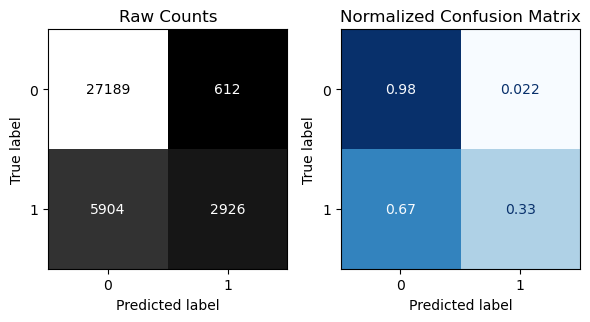


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      9354
           1       0.68      0.27      0.38      2857

    accuracy                           0.80     12211
   macro avg       0.74      0.61      0.63     12211
weighted avg       0.78      0.80      0.76     12211



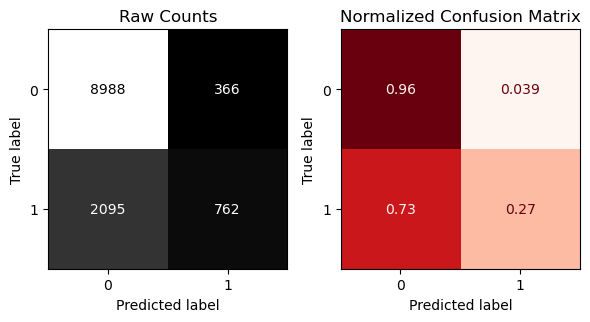

In [510]:
#PCA 3 Components

x1=df_income_pca.drop(columns='income')
y1=df_income_pca['income']
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1,y1, random_state=42)
knn.fit(xtrain1,ytrain1)
evaluate_classification(knn, xtrain1,ytrain1, xtest1, ytest1)

In [511]:
xtrain.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'cluster'],
      dtype='object')

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     27801
           1       0.83      0.34      0.48      8830

    accuracy                           0.82     36631
   macro avg       0.82      0.66      0.69     36631
weighted avg       0.82      0.82      0.79     36631



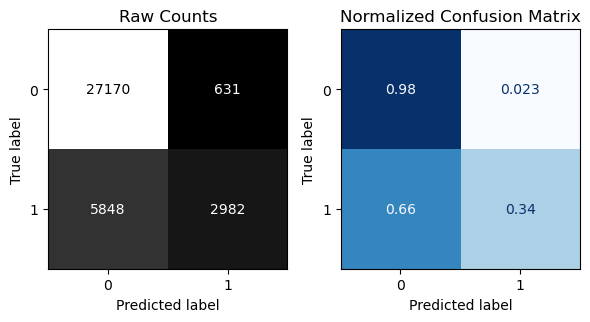


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      9354
           1       0.68      0.27      0.39      2857

    accuracy                           0.80     12211
   macro avg       0.74      0.62      0.63     12211
weighted avg       0.78      0.80      0.76     12211



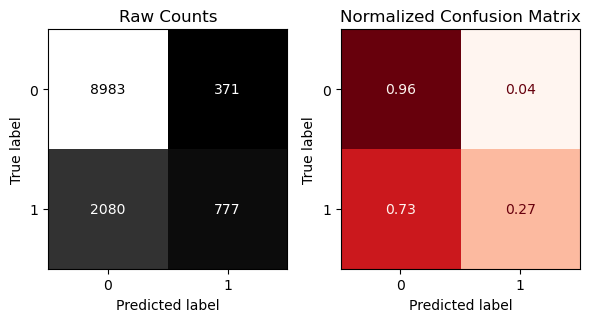

In [512]:
## Kmeans Data
knn.fit(xtrain,ytrain)
evaluate_classification(knn, xtrain,ytrain, xtest, ytest)

In [513]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier

In [514]:
#Apply at least one method of feature selection (filtering, embedded, wrapper).
#Wrapper method
dt = DecisionTreeClassifier(random_state = 42)
sk_sfs = SequentialFeatureSelector(dt, n_features_to_select=8,
                                direction = 'forward', cv=2,
                                 n_jobs=-1)
sk_sfs.fit(xtrain,ytrain)

SequentialFeatureSelector(cv=2,
                          estimator=DecisionTreeClassifier(random_state=42),
                          n_features_to_select=8, n_jobs=-1)

In [515]:
sk_sfs.support_[0:5]

array([False, False, False,  True,  True])

In [516]:
features_to_keep = sk_sfs.support_
Xtrain_8 = xtrain.loc[:,features_to_keep]
Xtest_8 = xtest.loc[:,features_to_keep]
Xtrain_8.shape

(36631, 8)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     27801
           1       0.81      0.64      0.72      8830

    accuracy                           0.88     36631
   macro avg       0.85      0.80      0.82     36631
weighted avg       0.87      0.88      0.87     36631



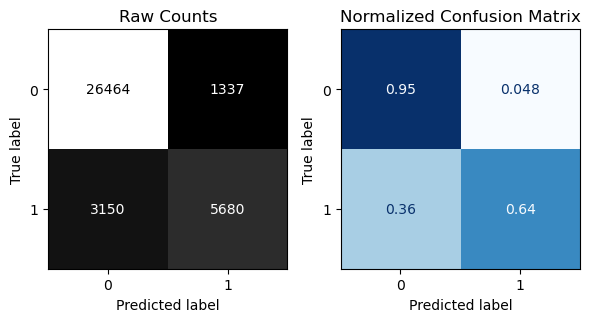


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      9354
           1       0.78      0.61      0.68      2857

    accuracy                           0.87     12211
   macro avg       0.83      0.78      0.80     12211
weighted avg       0.86      0.87      0.86     12211



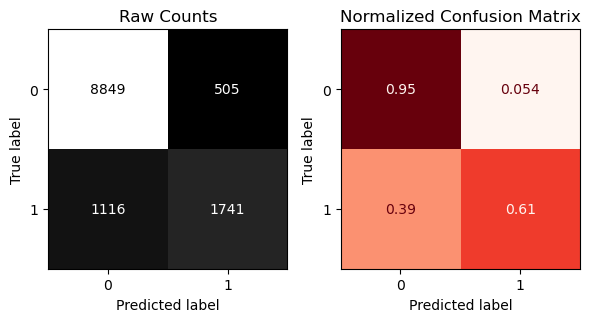

In [517]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(Xtrain_8, ytrain)
# Evaluate with custom function
evaluate_classification(rf_clf, Xtrain_8, ytrain, Xtest_8, ytest)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     27801
           1       0.82      0.51      0.63      8830

    accuracy                           0.86     36631
   macro avg       0.84      0.74      0.77     36631
weighted avg       0.85      0.86      0.84     36631



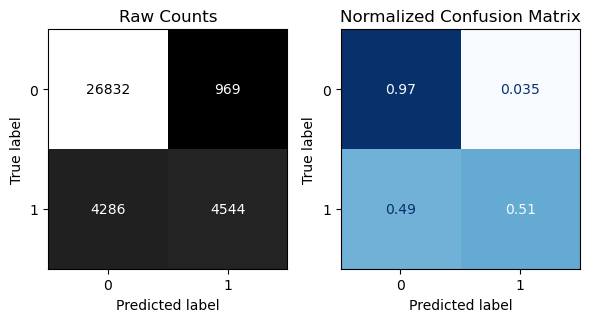


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      9354
           1       0.82      0.52      0.64      2857

    accuracy                           0.86     12211
   macro avg       0.84      0.74      0.77     12211
weighted avg       0.86      0.86      0.85     12211



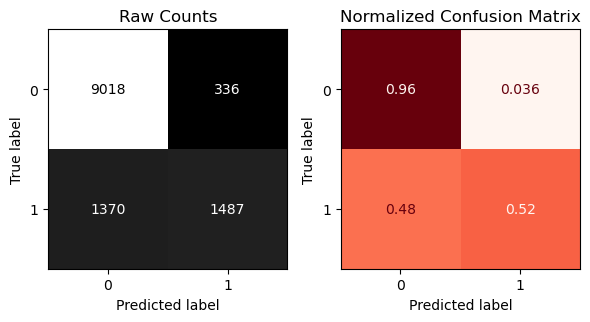

In [518]:
#Fit and evaluate a final model using the selected features.
knn.fit(Xtrain_8,ytrain)
evaluate_classification(knn, Xtrain_8,ytrain, Xtest_8, ytest)

The best model is Knn with selected features

In [519]:
r1 = permutation_importance(knn, Xtest_8, ytest,n_repeats =5)

In [524]:
Xtest_8.columns

Index(['education', 'marital-status', 'occupation', 'relationship', 'gender',
       'capital-gain', 'capital-loss', 'native-country'],
      dtype='object')

In [525]:
permutation_importances1 = pd.Series(r1['importances_mean'],index=Xtest_8.columns,
                           name = 'permutation importance')
permutation_importances1 = permutation_importances1.sort_values(ascending=False)
permutation_importances1

capital-gain      0.068414
capital-loss      0.024339
education         0.022996
marital-status    0.020441
occupation        0.018229
relationship      0.010220
gender            0.001834
native-country    0.001572
Name: permutation importance, dtype: float64

[Text(0.5, 0, 'Permutation Importance')]

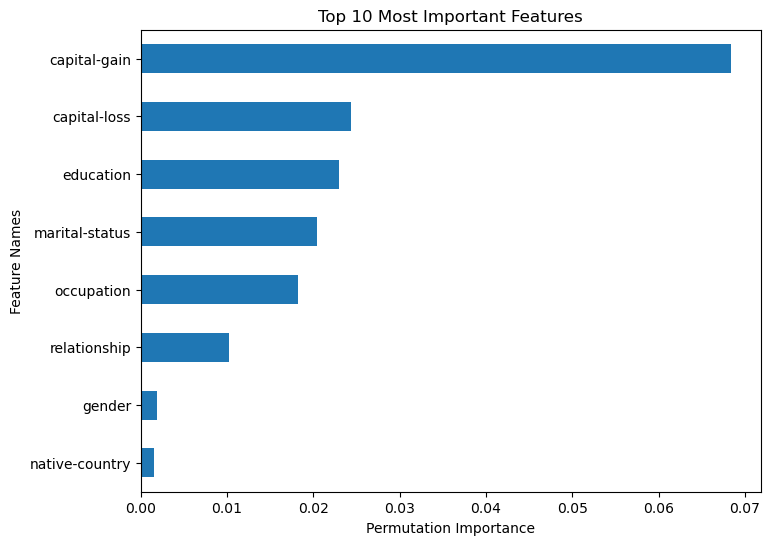

In [526]:
ax = plot_importance_color(permutation_importances1,top_n=10)
ax.set(xlabel='Permutation Importance')

In [527]:
permutation_importances1.sort_values(ascending=False).head(10)

capital-gain      0.068414
capital-loss      0.024339
education         0.022996
marital-status    0.020441
occupation        0.018229
relationship      0.010220
gender            0.001834
native-country    0.001572
Name: permutation importance, dtype: float64

The features are not the same as part 1 without feature selection as many features can be removed. 